In [3]:
# generate a dataset that includes numerical, categorical, and time-series data 
%pip install numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialize Faker and random seed
fake = Faker()
Faker.seed(42)
np.random.seed(42)

# Generate data
num_samples = 25

data = {
    'timestamp': [fake.date_time_this_decade() for _ in range(num_samples)],
    'category': np.random.choice(['A', 'B', 'C', 'D'], size=num_samples),
    'value1': np.random.normal(loc=50, scale=5, size=num_samples),
    'value2': np.random.normal(loc=100, scale=10, size=num_samples),
    'value3': np.random.randint(1, 100, size=num_samples),
    'value4': np.random.randint(1, 1000, size=num_samples),
}

# Create DataFrame
df = pd.DataFrame(data)

# Introduce some null values
for _ in range(5):
    idx = np.random.randint(0, num_samples)
    df.loc[idx, 'value2'] = None

# Introduce some duplicate values
for _ in range(5):
    idx1, idx2 = np.random.randint(0, num_samples, size=2)
    df.loc[idx2, 'value3'] = df.loc[idx1, 'value3']

# Save DataFrame to CSV (optional, for demonstration purposes)
df.to_csv('plotting_dataset.csv', index=False)

print(df.head())


            timestamp category     value1      value2  value3  value4
0 2020-12-11 21:26:47        C  50.111109  100.666573      41     218
1 2020-03-18 16:56:13        D  47.861035   98.237143      78     503
2 2022-05-04 11:40:21        A  47.340913  112.008928       7     767
3 2022-01-30 20:27:37        C  49.412622         NaN      73     398
4 2021-11-24 11:47:57        C  51.110395   98.283712      72     871


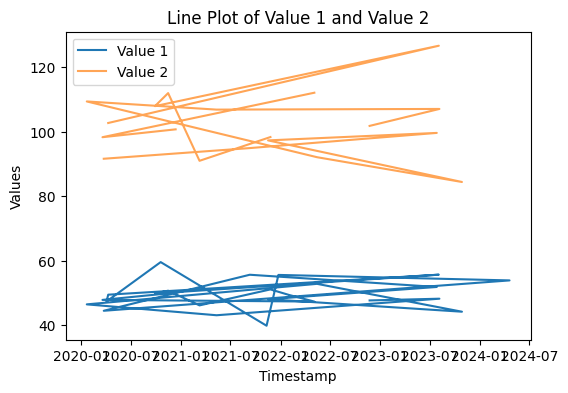

'\n\n\n\n'

In [5]:
import matplotlib.pyplot as plt

# Line Plot
plt.figure(figsize=(6, 4))
plt.plot(df['timestamp'], df['value1'], label='Value 1')
plt.plot(df['timestamp'], df['value2'], label='Value 2', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Line Plot of Value 1 and Value 2')
plt.legend()
plt.show()

'''



'''




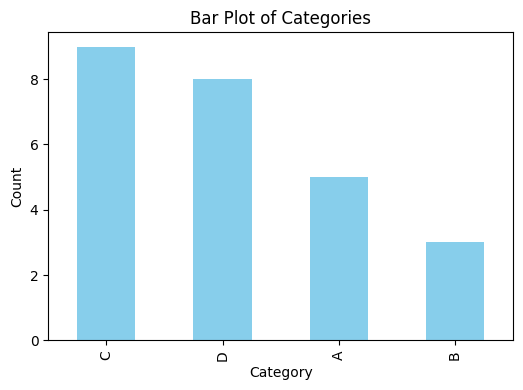

In [6]:
# Bar Plot
plt.figure(figsize=(6, 4))
df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot of Categories')
plt.show()

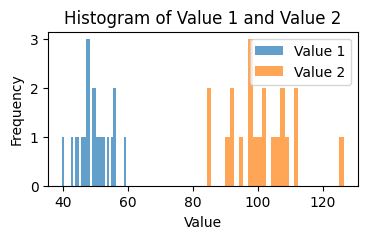

In [7]:
# Histogram
plt.figure(figsize=(4, 2))
plt.hist(df['value1'], bins=30, alpha=0.7, label='Value 1')
plt.hist(df['value2'], bins=30, alpha=0.7, label='Value 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value 1 and Value 2')
plt.legend()
plt.show()





([<matplotlib.patches.Wedge at 0x10dc58d4fb0>,
 [Text(1.091098212341016, 0.1396591959959641, ''),
  Text(1.023072862528683, 0.404131065320852, ''),
  Text(0.8965030709177871, 0.6374027328424136, ''),
  Text(0.7144554180005265, 0.8363931226939239, ''),
  Text(0.4800026874982826, 0.9897461391662138, ''),
  Text(0.22332260969838208, 1.0770919236525285, ''),
  Text(-0.04581406817389626, 1.0990455273360416, ''),
  Text(-0.32200140016617174, 1.0518151445434816, ''),
  Text(-0.589046851229497, 0.9289907464859998, ''),
  Text(-0.8133728352023104, 0.7405569734699387, ''),
  Text(-0.9692555562217029, 0.520138122745639, ''),
  Text(-1.0732825979142502, 0.24096569260879921, ''),
  Text(-1.099445599402214, -0.03491953543657811, ''),
  Text(-1.058884302030111, -0.29793293694085676, ''),
  Text(-0.9363715962756934, -0.577241919552028, ''),
  Text(-0.7644821799821253, -0.7909279338155768, ''),
  Text(-0.5408105071667172, -0.9578747284160274, ''),
  Text(-0.26236417919638033, -1.0682532646683602, ''),


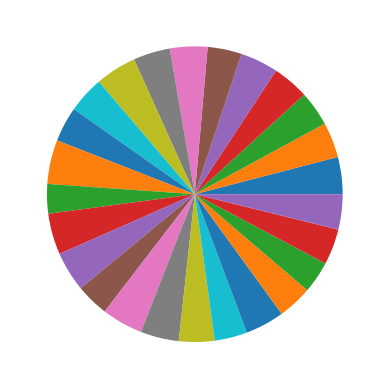

In [8]:
plt.pie(df['value1'])


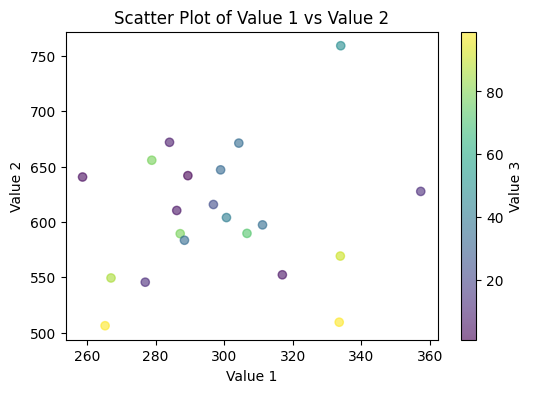

In [9]:
# Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(df['value1']*6, df['value2']*6, alpha=0.6, c=df['value3'], cmap='viridis')
plt.colorbar(label='Value 3')
plt.xlabel('Value 1')
plt.ylabel('Value 2')
plt.title('Scatter Plot of Value 1 vs Value 2')
plt.show()

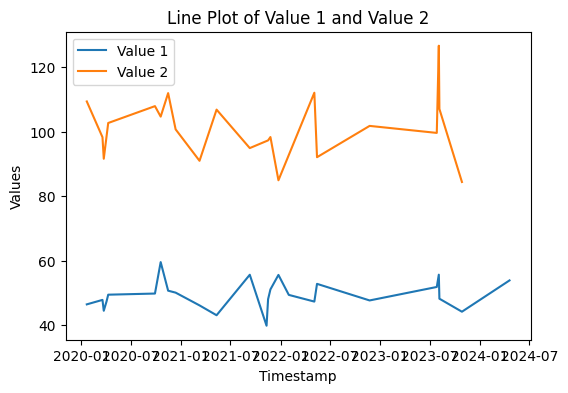

C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_21028\2168523798.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='viridis')


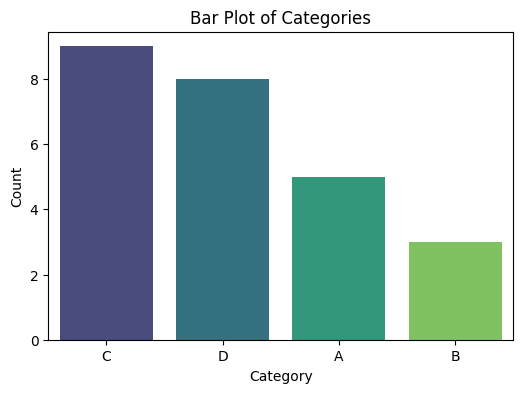

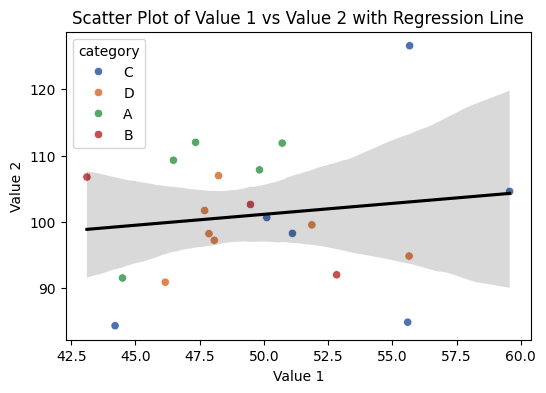

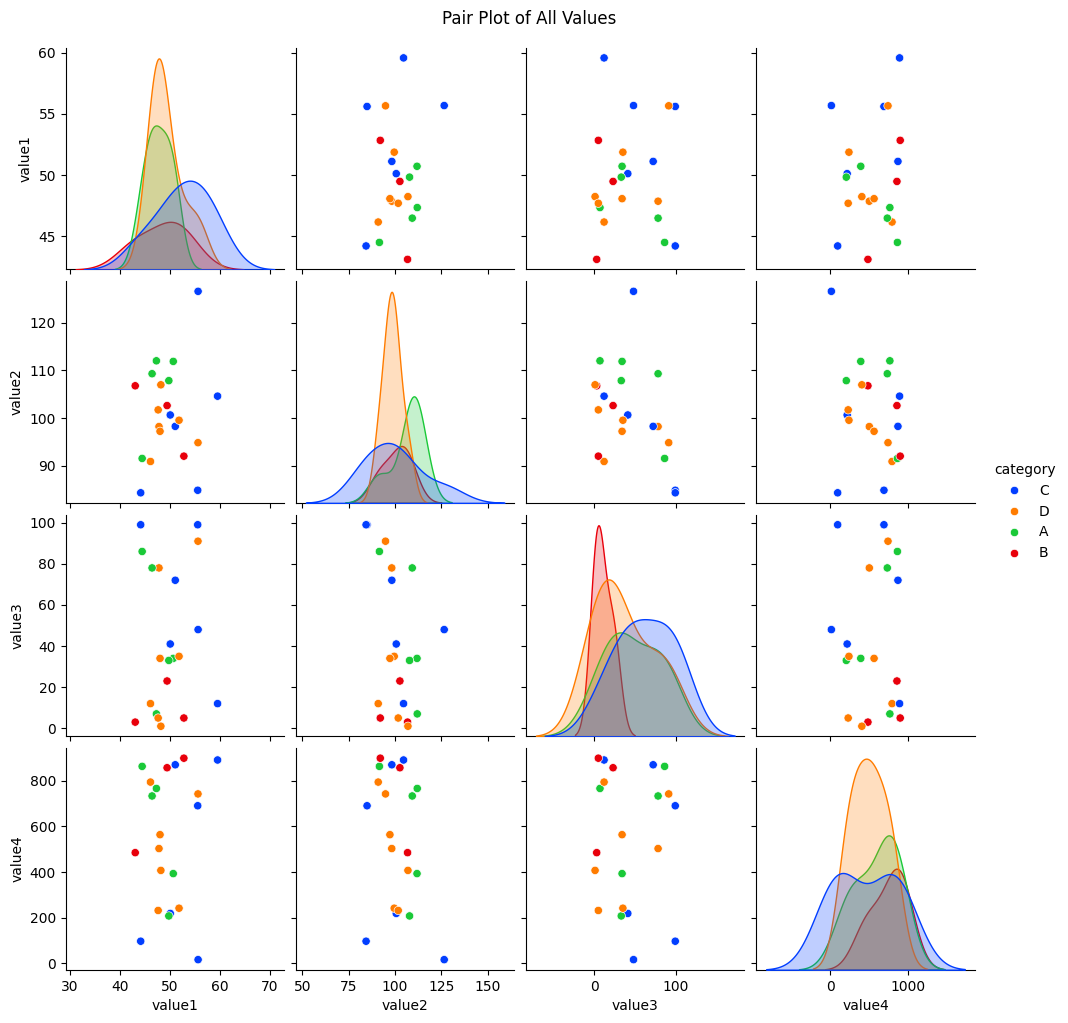

In [10]:
import seaborn as sns

# Line Plot
plt.figure(figsize=(6, 4))
sns.lineplot(x='timestamp', y='value1', data=df, label='Value 1')
sns.lineplot(x='timestamp', y='value2', data=df, label='Value 2')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Line Plot of Value 1 and Value 2')
plt.legend()
plt.show()

# Bar Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='category', data=df, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot of Categories')
plt.show()

# Scatter Plot with Regression Line
plt.figure(figsize=(6, 4))
sns.scatterplot(x='value1', y='value2', hue='category', data=df, palette='deep')
sns.regplot(x='value1', y='value2', data=df, scatter=False, color='black')
plt.xlabel('Value 1')
plt.ylabel('Value 2')
plt.title('Scatter Plot of Value 1 vs Value 2 with Regression Line')
plt.show()

# Pair Plot
sns.pairplot(df.dropna(), hue='category', palette='bright')
plt.suptitle('Pair Plot of All Values', y=1.02)
plt.show()


In [11]:
%pip install plotly==5.22.0


Note: you may need to restart the kernel to use updated packages.


In [12]:
%pip install nbformat


Note: you may need to restart the kernel to use updated packages.


In [15]:
import plotly.express as px

# Line Plot
fig = px.line(df, x='timestamp', y=['value1', 'value2'], labels={'value1': 'Value 1', 'value2': 'Value 2'}, title='Line Plot of Value 1 and Value 2')
fig.show()

# Bar Plot
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
fig = px.bar(category_counts, x='category', y='count', labels={'category': 'Category', 'count': 'Count'}, title='Bar Plot of Categories')
fig.show()

# Scatter Plot
fig = px.scatter(df, x='value1', y='value2', color='value3', color_continuous_scale='Viridis', labels={'value1': 'Value 1', 'value2': 'Value 2', 'value3': 'Value 3'}, title='Scatter Plot of Value 1 vs Value 2')
fig.show()


# Create separate histograms (adjust bin_centers if needed)
hist1 = px.histogram(df, x='value1', histfunc='count',  # Use 'count' for bin counts
                     title='Histogram of Value 1')
hist2 = px.histogram(df, x='value2', histfunc='count')

# Combine histograms and adjust layout
fig = hist1.update_traces(opacity=0.7)
fig.add_trace(hist2.data[0].update(opacity=0.7))
fig.update_layout(barmode='overlay', title='Histogram of Value 1 and 2')
fig.show()

In [1]:
fig = plt.figure()
Z = np.arange(10000).reshape((100, 100))
Z[:, 50:] = 1

im1 = fig.figimage(Z, xo=50, yo=0, origin='lower')
im2 = fig.figimage(Z, xo=100, yo=100, alpha=.8, origin='lower')

plt.show()
print("naya try")

NameError: name 'plt' is not defined